In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/mrseleznev/Desktop/проект/SALES-full.csv', sep=';')

In [3]:
df = df[:40000000]
df.shape

(40000000, 9)

In [4]:
df.rename(columns={'Code_AP' : 'SKU_id',
                   'store_id' : 'Store_id',
                   'curr_date' : 'Date',
                   'stock' : 'Stock',
                   'sales_regular' : 'Sales',
                   'price_regular' : 'Regular_Price'
                    }, inplace=True)
# df.drop(['sales_promo', 'price_promo', 'flag_promo'], axis=1, inplace=True)

In [5]:
df = df.loc[df['Stock'] > df['Sales']]

df['Demand'] = df.loc[df['Stock'] > 0, 'Sales']
#df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index(['SKU_id', 'Store_id', 'Date'], inplace=True)

In [7]:
level_values = df.index.get_level_values
df_w = (df.groupby([level_values(i) for i in [0,1]]
                      +[pd.Grouper(freq='W', level=-1)]).mean())
# агрегация исходных данные в разрезе SKU|Store|Week

In [8]:
df_w.reset_index(inplace=True)
df.reset_index(inplace=True)

In [9]:
df['Round_Price'] = round(df['Regular_Price'])
df_w['Round_Price'] = round(df_w['Regular_Price'])

In [10]:
df

,SKU_id,Store_id,Date,Stock,Sales,Regular_Price,sales_promo,price_promo,flag_promo,Demand,Round_Price
0,114,1078,2018-08-05,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
1,114,1078,2018-08-06,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
2,114,1078,2018-08-07,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
3,114,1078,2018-08-08,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
4,114,1078,2018-08-09,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
39284720,14978,1180,2017-11-06,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284721,14978,1180,2017-11-07,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284722,14978,1180,2017-11-08,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284723,14978,1180,2017-11-09,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0


In [11]:
df_w

,SKU_id,Store_id,Date,Stock,Sales,Regular_Price,sales_promo,price_promo,flag_promo,Demand,Round_Price
0,114,1078,2018-08-05,2.000000,0.0,30.0,0.0,NaN,0.0,0.0,30.0
1,114,1078,2018-08-12,3.142857,0.0,30.0,0.0,NaN,0.0,0.0,30.0
2,114,1078,2018-08-19,6.000000,0.0,30.0,0.0,NaN,0.0,0.0,30.0
3,114,1078,2018-08-26,6.000000,0.0,30.0,0.0,NaN,0.0,0.0,30.0
4,114,1078,2018-09-02,6.000000,0.0,30.0,0.0,NaN,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
5925960,14978,1179,2019-12-01,1.000000,0.0,320.0,0.0,NaN,0.0,0.0,320.0
5925961,14978,1179,2019-12-08,1.000000,0.0,320.0,0.0,NaN,0.0,0.0,320.0
5925962,14978,1179,2019-12-15,1.000000,0.0,320.0,0.0,NaN,0.0,0.0,320.0
5925963,14978,1180,2017-11-05,2.000000,0.0,254.0,0.0,NaN,0.0,0.0,254.0


In [12]:
sku_store_count_day = len(set(zip(df['SKU_id'], df['Store_id'])))
sku_store_count_week = len(set(zip(df_w['SKU_id'], df_w['Store_id'])))
print(sku_store_count_day, sku_store_count_day == sku_store_count_week)

59467 True


Кол-во пар sku|store в df такое же как и в df_w

In [13]:
popular_pairs = df.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_pairs[popular_pairs['counts'] >= 1000]

,SKU_id,Store_id,counts
0,5606,2834,1088
1,13316,2834,1088
2,3414,2834,1088
3,4404,2834,1088
4,1823,2834,1088
...,...,...,...
11745,1358,2231,1000
11746,11916,1128,1000
11747,7907,1900,1000
11748,1827,1079,1000


In [14]:
popular_pairs = df_w.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_pairs[popular_pairs['counts'] == 150]

,SKU_id,Store_id,counts
11166,13302,1169,150
11167,12603,1169,150
11168,552,1113,150
11169,5764,1085,150
11170,4643,1176,150
...,...,...,...
12044,1911,1138,150
12045,12582,1841,150
12046,1952,1173,150
12047,5454,1136,150


In [15]:
def transform(x, ttype):
    '''
    Accepts vector and performs transformation on it based on ttype
    '''
    if ttype == 'log':
        return np.log1p(x)
    
    return np.array(x)

In [16]:
def coef(model):
    """
    return regression coefficient of model
    """
    return model.params[1] if len(model.params) > 1 else model.params[0]

def pvalue(model):
    """
    return regression coefficient's t-test p-value of model
    """
    return model.pvalues[1] if len(model.pvalues) > 1 else model.pvalues[0]

In [17]:
def elasticity(X, y, model, model_type):
    '''
    Computes elasticity of model based on X, y, model itself and model's type
    '''
    if model_type == 'lin-lin':
        return coef(model) * np.mean(X) / np.mean(y)
    elif model_type == 'log-lin':
        return coef(model) * np.mean(X)
    elif model_type == 'log-log':
        return coef(model)

In [18]:
def PEDmodel(X, y, model_type='lin-lin'):
    '''
    Makes PED model based on input data X, y and model type
    '''
    _types = model_type.split('-')
    
    act_x = transform(X, _types[1])
    act_x = sm.add_constant(act_x)
    
    act_y = transform(y, _types[0])
    
    return sm.OLS(act_y, act_x).fit()

In [19]:
def get_model_stats(X, y, model, model_type):
    '''
    returns model's statistics
        regression coefficient,
        R-squared,
        T-test p-value,
        elasticity
    '''
    elas = elasticity(X, y, model, model_type)
    
    return coef(model), model.rsquared, pvalue(model), elas

In [78]:
df

,SKU_id,Store_id,Date,Stock,Sales,Regular_Price,sales_promo,price_promo,flag_promo,Demand,Round_Price
0,114,1078,2018-08-05,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
1,114,1078,2018-08-06,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
2,114,1078,2018-08-07,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
3,114,1078,2018-08-08,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
4,114,1078,2018-08-09,2.0,0.0,30.0,0.0,NaN,0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
39284720,14978,1180,2017-11-06,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284721,14978,1180,2017-11-07,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284722,14978,1180,2017-11-08,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0
39284723,14978,1180,2017-11-09,2.0,0.0,254.0,0.0,NaN,0,0.0,254.0


In [20]:
day_sample_size = [x for x in range(10, 100, 10)] + [x for x in range(100, 1001, 100)]
week_sample_size = [x for x in range(10, 151, 10)]

popular_pairs_day = df.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_pairs_week = df_w.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)


def GeneratePEDModels(dataset, date_type='day'):
    all_model_types = ['log-log']
    sku_id, store_id, coeff, rsquared, ttpvalue, elas, mtype = [], [], [], [], [], [], []
    num_diff_prices = []
    prices_mean_val = []
    qty, sample_sizes = [], []
    
    if date_type == 'day':
        global_sample_sizes = day_sample_size
        popular_pairs = popular_pairs_day
    if date_type == 'week':
        global_sample_sizes = week_sample_size
        popular_pairs = popular_pairs_week
        
    pairs_for_experiment = []
    for i, r in popular_pairs.iterrows():
        #всего пар sku|store в нашей выборке 
        if i == 10000:
            break
        pairs_for_experiment.append((r['SKU_id'], r['Store_id']))
    
    
        
    #идем по всем парам sku|store
    for good_id, shop_id in pairs_for_experiment:
        #выбираем строки с конкретным значением sku|store
        pairs_data = dataset[(dataset.Store_id == shop_id) & (dataset.SKU_id == good_id)]
        if pairs_data.Demand.sum() == 0:
            continue
        #идем по всем размерам
        for current_sample_size in global_sample_sizes:
            #делаем проверку на SampleSize (достаточность)
            if pairs_data.shape[0] < current_sample_size:
                break
            #разбиваем данные на сэмплы
            data = pairs_data.sample(n=current_sample_size, replace=False)
            #делаем проверку на то, что если у нас всего одно значение demand и оно 0 или если такой пары sku|store нету
            if (len(data.Demand) == 1 and data.loc[0, 'Demand'] == 0) or data.empty == True or data.Demand.sum() == 0:
                continue
            #суммируем спрос
            curQty = data.Demand.sum()
            
            prices_mean_val_sample = data['Regular_Price'].mean()
            num_diff_prices_sample = data.groupby(by='Round_Price').count().shape[0]
            #теперь идем по всем моделям
            for model_type in all_model_types:
                #строим модель где в роли признака - цена, таргет - спрос
                model = PEDmodel(data.Regular_Price, data.Demand, model_type)
                #считаем статистику
                c, r2, tp, e = get_model_stats(data.Regular_Price, data.Demand, model, model_type)

                sku_id.append(good_id)
                store_id.append(shop_id)
                coeff.append(c)
                rsquared.append(r2)
                ttpvalue.append(tp)
                elas.append(e)
                mtype.append(model_type)
                qty.append(curQty)
                prices_mean_val.append(prices_mean_val_sample)
                num_diff_prices.append(num_diff_prices_sample)
                sample_sizes.append(current_sample_size)
    
    return pd.DataFrame({
        'SKU': sku_id,
        'Store': store_id,
        'Coefficient': coeff,
        'R-squared': rsquared,
        'T-test-p-value': ttpvalue,
        'Model-type': mtype,
        'Elasticity': elas,
        'Qty': qty,
        'Prices_mean_val' : prices_mean_val,
        'Num_diff_prices': num_diff_prices,
        'SampleSize': sample_sizes
    })

In [21]:
sample_data_day = GeneratePEDModels(df)
sample_data_day['Гранулярность эластичности'] = 'SKU|Store'
sample_data_day['Гранулярность trainset'] = 'SKU|Store|Day'

In [22]:
sample_data_week = GeneratePEDModels(df_w, date_type='week')
sample_data_week['Гранулярность эластичности'] = 'SKU|Store'
sample_data_week['Гранулярность trainset'] = 'SKU|Store|Week'

In [23]:
sample_data_day.to_csv('sample_data_day.csv', index=False)
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,5606,2834,0.015540,0.000024,0.989195,log-log,0.015540,7.0,357.719000,9,10,SKU|Store,SKU|Store|Day
1,5606,2834,-0.865168,0.052210,0.332562,log-log,-0.865168,8.0,332.458500,18,20,SKU|Store,SKU|Store|Day
2,5606,2834,1.427389,0.258503,0.004121,log-log,1.427389,9.0,338.628667,25,30,SKU|Store,SKU|Store|Day
3,5606,2834,1.004575,0.178512,0.006609,log-log,1.004575,12.0,337.873250,30,40,SKU|Store,SKU|Store|Day
4,5606,2834,1.609911,0.245646,0.000252,log-log,1.609911,26.0,338.308400,35,50,SKU|Store,SKU|Store|Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179469,1460,1137,0.017944,0.001202,0.396636,log-log,0.017944,7.0,307.055000,9,600,SKU|Store,SKU|Store|Day
179470,1460,1137,0.025022,0.003007,0.147225,log-log,0.025022,6.0,309.574286,10,700,SKU|Store,SKU|Store|Day
179471,1460,1137,0.013934,0.000536,0.513274,log-log,0.013934,12.0,308.592500,10,800,SKU|Store,SKU|Store|Day
179472,1460,1137,0.016250,0.000764,0.407465,log-log,0.016250,13.0,308.911111,10,900,SKU|Store,SKU|Store|Day


In [24]:
sample_data_week.to_csv('sample_data_week.csv', index=False)
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,10220,2834,4.747860,0.180551,0.220926,log-log,4.747860,5.857143,130.115667,7,10,SKU|Store,SKU|Store|Week
1,10220,2834,8.030151,0.470214,0.000845,log-log,8.030151,11.571429,130.333786,11,20,SKU|Store,SKU|Store|Week
2,10220,2834,4.942348,0.237579,0.006295,log-log,4.942348,20.428571,130.245810,13,30,SKU|Store,SKU|Store|Week
3,10220,2834,6.511298,0.212725,0.002741,log-log,6.511298,29.238095,129.250352,13,40,SKU|Store,SKU|Store|Week
4,10220,2834,5.059088,0.170722,0.002861,log-log,5.059088,36.666667,129.533850,15,50,SKU|Store,SKU|Store|Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148296,14681,1099,-0.083411,0.011606,0.262615,log-log,-0.083411,8.566667,496.750216,25,110,SKU|Store,SKU|Store|Week
148297,14681,1099,-0.151039,0.053218,0.011247,log-log,-0.151039,7.352381,501.885317,28,120,SKU|Store,SKU|Store|Week
148298,14681,1099,-0.138556,0.037778,0.026700,log-log,-0.138556,8.733333,500.924542,28,130,SKU|Store,SKU|Store|Week
148299,14681,1099,-0.103000,0.021425,0.084407,log-log,-0.103000,9.590476,502.006463,31,140,SKU|Store,SKU|Store|Week


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
Y = ['Coefficient', 'R-squared', 'Elasticity']

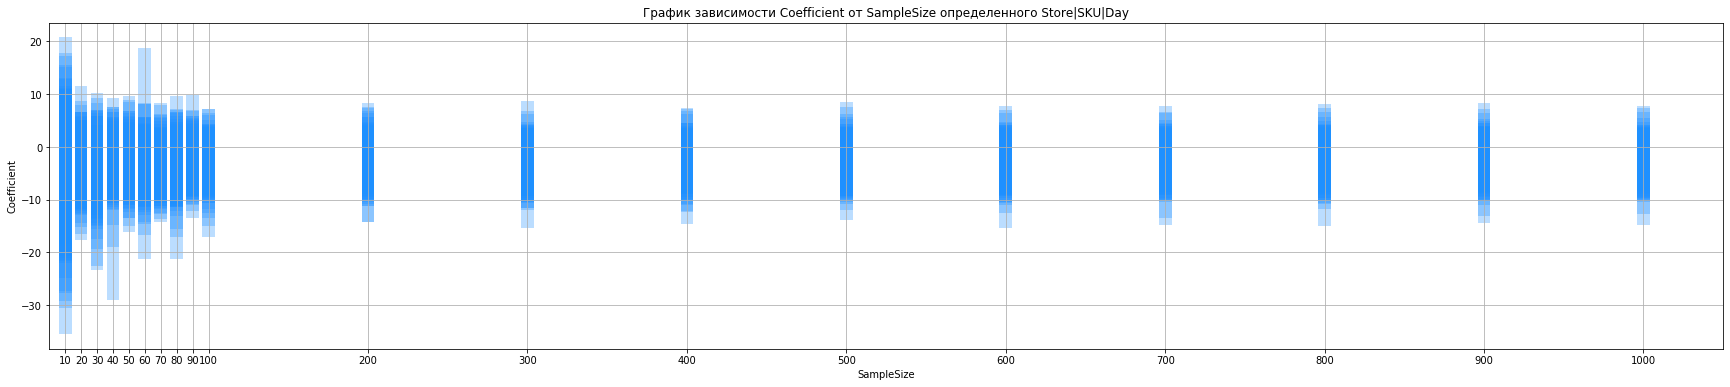

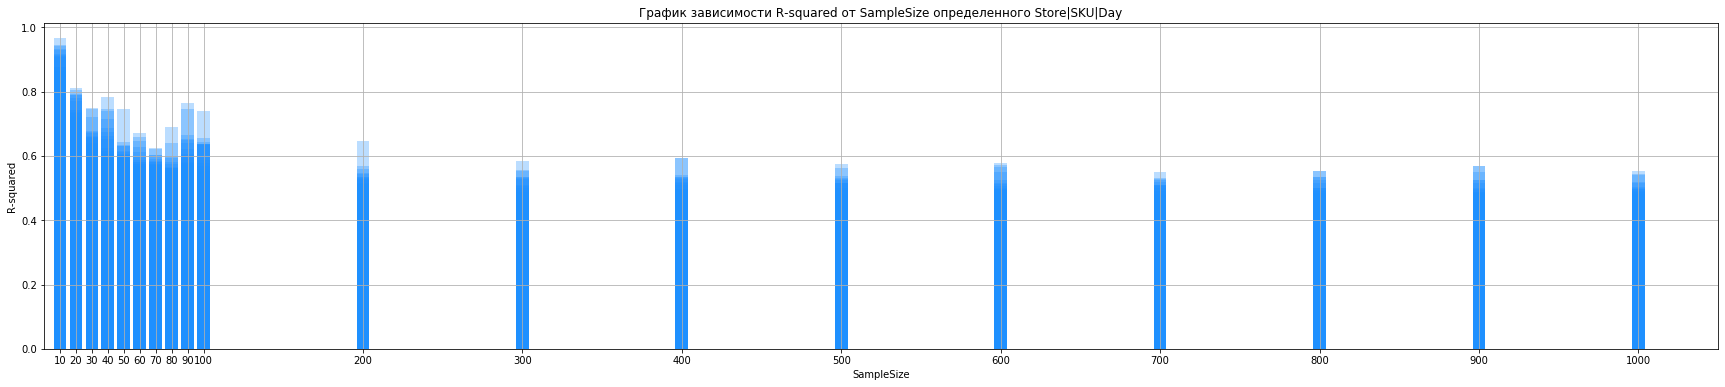

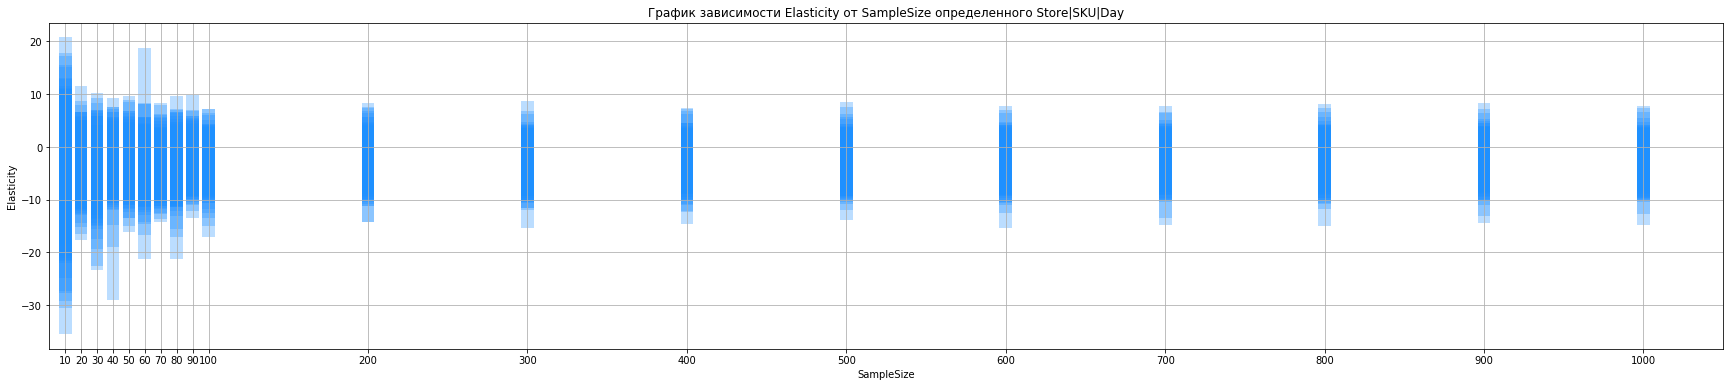

In [27]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_day['SampleSize'], height=sample_data_day[y], 
           width=8, color='dodgerblue', alpha=0.3)
    plt.xlim([0, 1050])      #  диапазон оси x
    fig.set_figwidth(30)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks([x for x in range(10, 110, 10)] + [x for x in range(200, 1050, 100)])
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного Store|SKU|Day')
    
    plt.show()

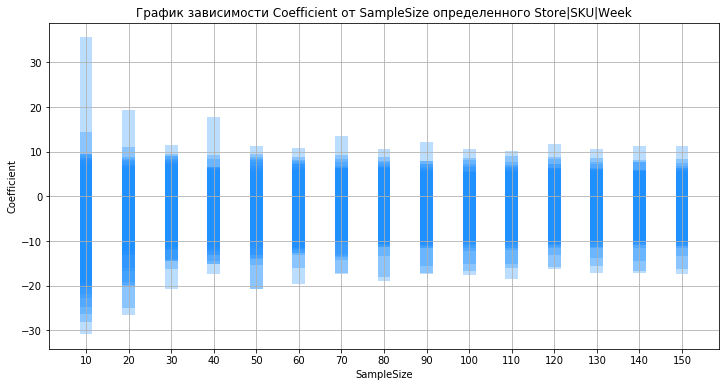

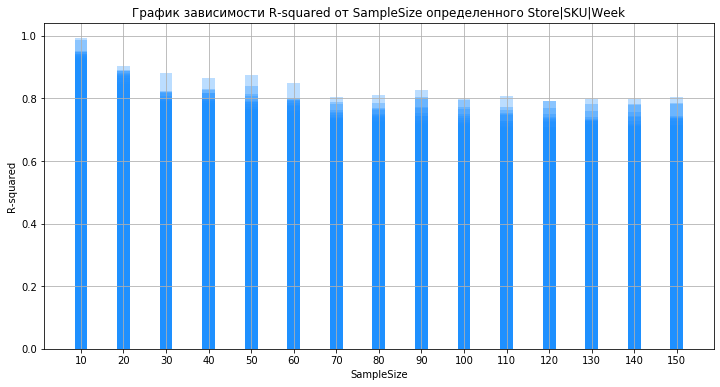

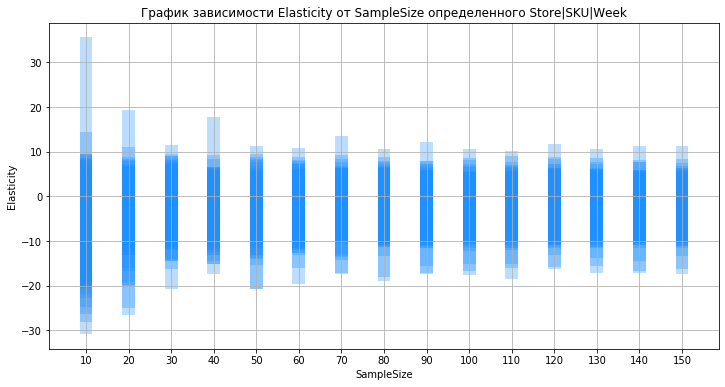

In [28]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_week['SampleSize'], height=sample_data_week[y], 
           width=3, color='dodgerblue', alpha=0.3)
    #plt.xlim([0, 13])      #  диапазон оси x
    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks(week_sample_size)
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного Store|SKU|Week')
    
    plt.show()

In [29]:
#sns.pairplot(sample_data_day[Y + ['SampleSize']]);

In [30]:
#sns.pairplot(sample_data_week[Y + ['SampleSize']]);

# Подсчет адекватных значений

In [31]:
sample_data_day.isna().sum()

SKU                           0
Store                         0
Coefficient                   0
R-squared                     0
T-test-p-value                0
Model-type                    0
Elasticity                    0
Qty                           0
Prices_mean_val               0
Num_diff_prices               0
SampleSize                    0
Гранулярность эластичности    0
Гранулярность trainset        0
dtype: int64

In [32]:
sample_data_day.dropna(inplace=True)

In [33]:
#адекватные значения
min_elast, max_elast = -10, 0
p_value = 0.05

In [34]:
#считаем адекватные значения для SKU_id|Day
sample_data_day['flag_AE'] = ((sample_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_day['flag_R&AE'] = ((sample_data_day['flag_AE']) &
                                               (sample_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [35]:
#считаем адекватные значения для SKU_id|Week
sample_data_week['flag_AE'] = ((sample_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_week['flag_R&AE'] = ((sample_data_week['flag_AE']) &
                                               (sample_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [36]:
#для подсчета средневзвешенного значения по qty
sample_data_day['QTY_AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_AE']
sample_data_day['QTY_R&AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_R&AE']

In [37]:
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_day,QTY_R&AE_day
0,5606,2834,0.015540,0.000024,0.989195,log-log,0.015540,7.0,357.719000,9,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
1,5606,2834,-0.865168,0.052210,0.332562,log-log,-0.865168,8.0,332.458500,18,20,SKU|Store,SKU|Store|Day,1,0,8.0,0.0
2,5606,2834,1.427389,0.258503,0.004121,log-log,1.427389,9.0,338.628667,25,30,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
3,5606,2834,1.004575,0.178512,0.006609,log-log,1.004575,12.0,337.873250,30,40,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
4,5606,2834,1.609911,0.245646,0.000252,log-log,1.609911,26.0,338.308400,35,50,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179469,1460,1137,0.017944,0.001202,0.396636,log-log,0.017944,7.0,307.055000,9,600,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179470,1460,1137,0.025022,0.003007,0.147225,log-log,0.025022,6.0,309.574286,10,700,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179471,1460,1137,0.013934,0.000536,0.513274,log-log,0.013934,12.0,308.592500,10,800,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179472,1460,1137,0.016250,0.000764,0.407465,log-log,0.016250,13.0,308.911111,10,900,SKU|Store,SKU|Store|Day,0,0,0.0,0.0


In [38]:
#для подсчета средневзвешенного значения по qty
sample_data_week['QTY_AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_AE']
sample_data_week['QTY_R&AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_R&AE']

In [39]:
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_week,QTY_R&AE_week
0,10220,2834,4.747860,0.180551,0.220926,log-log,4.747860,5.857143,130.115667,7,10,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
1,10220,2834,8.030151,0.470214,0.000845,log-log,8.030151,11.571429,130.333786,11,20,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
2,10220,2834,4.942348,0.237579,0.006295,log-log,4.942348,20.428571,130.245810,13,30,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
3,10220,2834,6.511298,0.212725,0.002741,log-log,6.511298,29.238095,129.250352,13,40,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
4,10220,2834,5.059088,0.170722,0.002861,log-log,5.059088,36.666667,129.533850,15,50,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148296,14681,1099,-0.083411,0.011606,0.262615,log-log,-0.083411,8.566667,496.750216,25,110,SKU|Store,SKU|Store|Week,1,0,8.566667,0.000000
148297,14681,1099,-0.151039,0.053218,0.011247,log-log,-0.151039,7.352381,501.885317,28,120,SKU|Store,SKU|Store|Week,1,1,7.352381,7.352381
148298,14681,1099,-0.138556,0.037778,0.026700,log-log,-0.138556,8.733333,500.924542,28,130,SKU|Store,SKU|Store|Week,1,1,8.733333,8.733333
148299,14681,1099,-0.103000,0.021425,0.084407,log-log,-0.103000,9.590476,502.006463,31,140,SKU|Store,SKU|Store|Week,1,0,9.590476,0.000000


## lim elas

In [313]:
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_day,QTY_R&AE_day
0,5606,2834,0.015540,0.000024,0.989195,log-log,0.015540,7.0,357.719000,9,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
1,5606,2834,-0.865168,0.052210,0.332562,log-log,-0.865168,8.0,332.458500,18,20,SKU|Store,SKU|Store|Day,1,0,8.0,0.0
2,5606,2834,1.427389,0.258503,0.004121,log-log,1.427389,9.0,338.628667,25,30,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
3,5606,2834,1.004575,0.178512,0.006609,log-log,1.004575,12.0,337.873250,30,40,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
4,5606,2834,1.609911,0.245646,0.000252,log-log,1.609911,26.0,338.308400,35,50,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179469,1460,1137,0.017944,0.001202,0.396636,log-log,0.017944,7.0,307.055000,9,600,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179470,1460,1137,0.025022,0.003007,0.147225,log-log,0.025022,6.0,309.574286,10,700,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179471,1460,1137,0.013934,0.000536,0.513274,log-log,0.013934,12.0,308.592500,10,800,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
179472,1460,1137,0.016250,0.000764,0.407465,log-log,0.016250,13.0,308.911111,10,900,SKU|Store,SKU|Store|Day,0,0,0.0,0.0


In [314]:
lim_elast = sample_data_day[['Elasticity', 'SKU', 'Store']][sample_data_day['SampleSize'] == 1000]
lim_elast

,Elasticity,SKU,Store
18,0.632492,5606,2834
37,2.298657,13316,2834
56,1.396072,3414,2834
75,-0.025779,4404,2834
94,0.801118,1823,2834
...,...,...,...
179408,-1.089219,8629,1170
179423,-0.595514,562,1890
179440,0.062574,562,1189
179459,-0.422193,3456,1137


In [315]:
lim_elast.rename(columns={'Elasticity' : 'lim_elas'}, inplace=True)
lim_elast

,lim_elas,SKU,Store
18,0.632492,5606,2834
37,2.298657,13316,2834
56,1.396072,3414,2834
75,-0.025779,4404,2834
94,0.801118,1823,2834
...,...,...,...
179408,-1.089219,8629,1170
179423,-0.595514,562,1890
179440,0.062574,562,1189
179459,-0.422193,3456,1137


In [316]:
sample_data_day_lim = sample_data_day.merge(lim_elast, how='outer', left_on=['SKU', 'Store'], right_on=['SKU', 'Store'])


In [321]:
sample_data_day_lim.dropna(inplace=True)

In [322]:
sample_data_day_lim['diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas'])

In [323]:
sample_data_day_lim['rel_diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas']) / abs(sample_data_day_lim['lim_elas'])


In [324]:
# from math import sqrt
# sample_data_day_lim['disp_lim'] = sqrt(sample_data_day_lim['diff_elas'].var())

In [325]:
# sample_data_day_lim.groupby('SampleSize').mean()

In [326]:
def percentile(n):
    '''Calculate n - percentile of data'''
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'pctl%s' % n
    return percentile_

In [327]:
lim_elas = sample_data_day_lim[['SampleSize', 'diff_elas', 'rel_diff_elas']].groupby('SampleSize').agg({'median', percentile(25), percentile(75)})
lim_elas

diff_elas                     rel_diff_elas                    
              pctl25    pctl75    median        pctl25    pctl75    median
SampleSize                                                                
10          0.322435  1.574811  0.767812      0.397123  2.048787  0.936375
20          0.180008  0.964491  0.439486      0.269460  1.342449  0.621783
30          0.137774  0.729230  0.335265      0.224789  1.057545  0.515959
40          0.114553  0.614367  0.284906      0.194844  0.920046  0.447388
50          0.095483  0.541584  0.241215      0.174179  0.826100  0.401296
60          0.088664  0.473095  0.217154      0.166397  0.763207  0.373712
70          0.077910  0.437647  0.197811      0.145395  0.718257  0.340008
80          0.074785  0.406150  0.184839      0.142757  0.666193  0.321517
90          0.067024  0.375231  0.172018      0.131886  0.626807  0.303659
100         0.062572  0.346637  0.159676      0.124489  0.596787  0.289110
200         0.039363  0.226591  0.100810      0.081846  0.410349  0.192653
300         0.030474  0.176139  0.078675      0.064522  0.333608  0.153578
400         0.023943  0.140850  0.063737      0.053685  0.268082  0.126168
500         0.020681  0.118916  0.052945      0.046739  0.224876  0.105994
600         0.015716  0.098144  0.043041      0.035594  0.183736  0.086271
700         0.013160  0.079949  0.036080      0.030563  0.153822  0.070155
800         0.010593  0.066223  0.028276      0.024586  0.126170  0.057694
900         0.008189  0.051131  0.022310      0.019752  0.095967  0.044957
1000        0.000000  0.000000  0.000000      0.000000  0.000000  0.000000

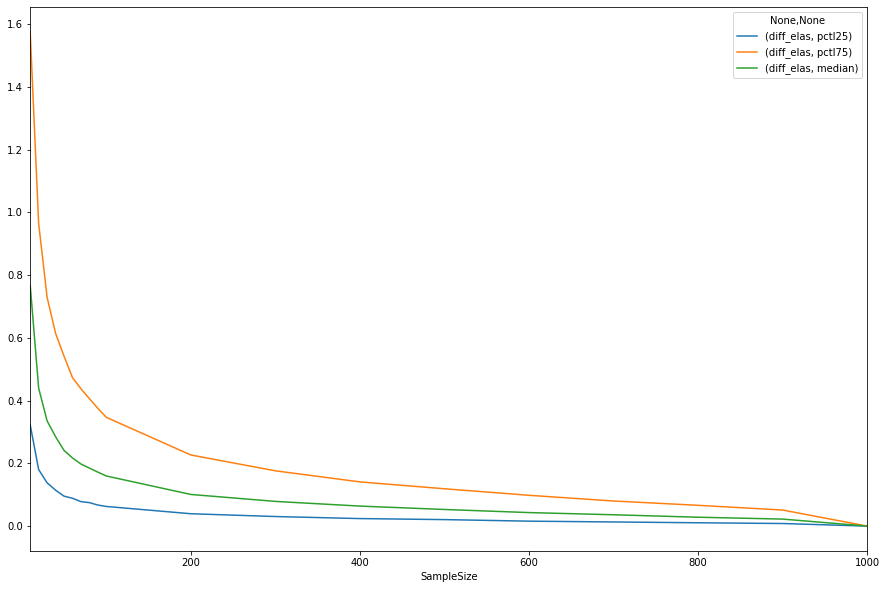

In [332]:
lim_elas.reset_index(inplace=True)
lim_elas[['SampleSize', 'diff_elas']].plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

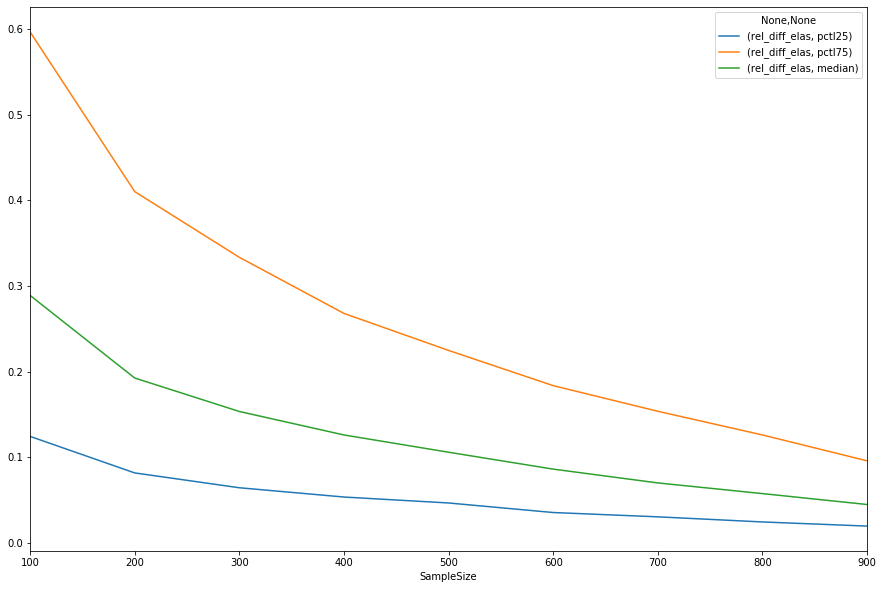

In [335]:
lim_elas[['SampleSize', 'rel_diff_elas']].tail(10).head(9).plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

In [60]:
adeq_day_prices = sample_data_day.groupby(['SampleSize', 'Prices_mean_val']).mean()

adeq_day_prices.reset_index(inplace=True)

adeq_day_prices.rename(columns={'flag_AE' : '%#_AE_day',
                         'flag_R&AE' : '%#_R&AE_day'}, inplace=True)
#для подсчета ср. взвеш.
adeq_day_prices['%QTY_AE_day'] = adeq_day_prices['QTY_AE_day'] / adeq_day_prices['Qty']
adeq_day_prices['%QTY_R&AE_day'] = adeq_day_prices['QTY_R&AE_day'] / adeq_day_prices['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_day', 'QTY_R&AE_day']
adeq_day_prices.drop(columns_drop, axis=1, inplace=True)
adeq_day_prices = adeq_day_prices[adeq_day_prices['SampleSize'] == 1000]
adeq_day_prices

,SampleSize,Prices_mean_val,Elasticity,Qty,Num_diff_prices,%#_AE_day,%#_R&AE_day,%QTY_AE_day,%QTY_R&AE_day
159465,1000,14.205860,-3.043375,341.0,5.0,1.0,1.0,1.0,1.0
159466,1000,14.549955,0.514946,195.0,7.0,0.0,0.0,0.0,0.0
159467,1000,14.783441,0.037998,8.0,4.0,0.0,0.0,0.0,0.0
159468,1000,14.892400,0.001920,16.0,4.0,0.0,0.0,0.0,0.0
159469,1000,14.992255,0.017216,11.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
169392,1000,2275.737000,-0.293185,84.0,42.0,1.0,1.0,1.0,1.0
169393,1000,2276.078000,-0.280312,98.0,32.0,1.0,1.0,1.0,1.0
169394,1000,2280.073000,-0.169364,49.0,35.0,1.0,1.0,1.0,1.0
169395,1000,2593.985579,-1.302089,381.0,95.0,1.0,1.0,1.0,1.0


In [77]:
# adeq_day_prices.plot(figsize=(15, 5), x='Prices_mean_val', y='Num_diff_prices')

## Зависимость свойств PED модели от количества разных значений цен

### Day

In [336]:
adeq_day_prices = sample_data_day.groupby(['SampleSize', 'Num_diff_prices']).agg({'mean', 'count'})

adeq_day_prices.reset_index(inplace=True)
adeq_day_prices = adeq_day_prices[adeq_day_prices['SampleSize'] == 1000]
adeq_day_prices = adeq_day_prices[adeq_day_prices[('SKU', 'count')] > 5]

adeq_day_prices.rename(columns={'flag_AE' : '%#_AE_day',
                          'flag_R&AE' : '%#_R&AE_day'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_day_prices['%QTY_AE_day'] = adeq_day_prices[('QTY_AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]
adeq_day_prices['%QTY_R&AE_day'] = adeq_day_prices[('QTY_R&AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]

In [337]:
adeq_day_prices

SampleSize Num_diff_prices   SKU              Store               \
                                count         mean count         mean   
1620       1000               5     8  9292.500000     8  1430.250000   
1621       1000               6    17  6821.529412    17  1152.764706   
1622       1000               7    47  5105.276596    47  1154.531915   
1623       1000               8    79  6017.493671    79  1155.063291   
1624       1000               9    95  5971.663158    95  1140.442105   
...         ...             ...   ...          ...   ...          ...   
1704       1000              89     7  5802.000000     7  1949.857143   
1706       1000              91     8  1674.750000     8  1538.875000   
1711       1000              96     7  4789.000000     7  2211.571429   
1715       1000             100     8  1623.250000     8  1646.625000   
1716       1000             101     9  2885.222222     9  1634.000000   

     Coefficient           R-squared            ... %#_AE_day            \
           count      mean     count      mean  ...     count      mean   
1620           8 -0.737956         8  0.029161  ...         8  0.750000   
1621          17 -0.404807        17  0.015522  ...        17  0.882353   
1622          47 -0.622893        47  0.022229  ...        47  0.872340   
1623          79 -0.582670        79  0.024176  ...        79  0.911392   
1624          95 -0.632264        95  0.025231  ...        95  0.936842   
...          ...       ...       ...       ...  ...       ...       ...   
1704           7  0.071264         7  0.065853  ...         7  0.571429   
1706           8 -0.143974         8  0.023639  ...         8  0.750000   
1711           7  0.358634         7  0.027450  ...         7  0.571429   
1715           8 -0.195496         8  0.012641  ...         8  0.875000   
1716           9 -0.275129         9  0.031229  ...         9  0.777778   

     %#_R&AE_day           QTY_AE_day             QTY_R&AE_day              \
           count      mean      count        mean        count        mean   
1620           8  0.375000          8  340.375000            8  287.625000   
1621          17  0.705882         17  185.705882           17  150.352941   
1622          47  0.765957         47  211.000000           47  197.617021   
1623          79  0.810127         79  245.506329           79  234.025316   
1624          95  0.757895         95  310.221053           95  289.557895   
...          ...       ...        ...         ...          ...         ...   
1704           7  0.571429          7  571.285714            7  571.285714   
1706           8  0.625000          8  390.375000            8  308.750000   
1711           7  0.571429          7  437.041429            7  437.041429   
1715           8  0.375000          8  942.500000            8  705.000000   
1716           9  0.666667          9  398.000000            9  368.111111   

     %QTY_AE_day %QTY_R&AE_day  
                                
1620    0.972153      0.821492  
1621    0.977702      0.791576  
1622    0.910234      0.852501  
1623    0.983719      0.937716  
1624    0.953014      0.889536  
...          ...           ...  
1704    0.354553      0.354553  
1706    0.785421      0.621195  
1711    0.279122      0.279122  
1715    0.998904      0.747191  
1716    0.995061      0.920334  

[83 rows x 28 columns]

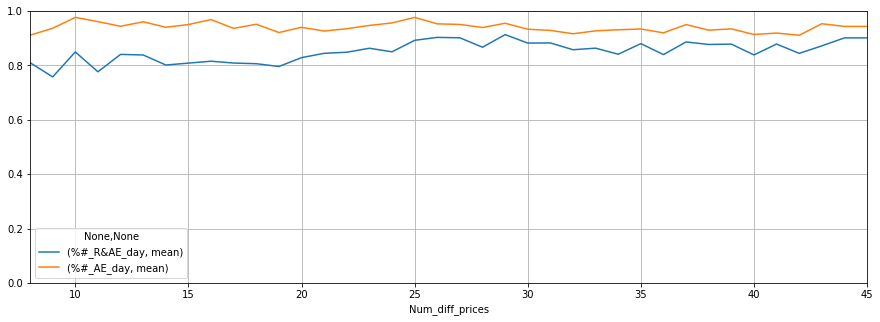

In [258]:
adeq_day_prices[[('%#_R&AE_day', 'mean'), ('%#_AE_day', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], grid=True)

In [252]:
# ae_stats = ['%#AE_day', '%#_R&AE_day', '%QTY_AE_day', '%QTY_R&AE_day']

# fig, ax = plt.subplots()
# fig.set_figwidth(12)    #  ширина Figure
# fig.set_figheight(6)    #  высота Figure
# ax.grid() # сетка

# plt.title('График зависимости адекватных значений от количества разных значений цен определенного SKU|Day')
# plt.xlabel('Num_diff_prices')
# plt.ylabel('%')

# for ae_stat in ae_stats:
#     ax.plot(adeq_day_prices['Num_diff_prices'], adeq_day_prices[ae_stat], label=ae_stat)
#     ax.legend()

### Week

In [48]:
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Prices_mean_val,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_week,QTY_R&AE_week
0,10220,2834,4.747860,0.180551,0.220926,log-log,4.747860,5.857143,130.115667,7,10,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
1,10220,2834,8.030151,0.470214,0.000845,log-log,8.030151,11.571429,130.333786,11,20,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
2,10220,2834,4.942348,0.237579,0.006295,log-log,4.942348,20.428571,130.245810,13,30,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
3,10220,2834,6.511298,0.212725,0.002741,log-log,6.511298,29.238095,129.250352,13,40,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
4,10220,2834,5.059088,0.170722,0.002861,log-log,5.059088,36.666667,129.533850,15,50,SKU|Store,SKU|Store|Week,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148296,14681,1099,-0.083411,0.011606,0.262615,log-log,-0.083411,8.566667,496.750216,25,110,SKU|Store,SKU|Store|Week,1,0,8.566667,0.000000
148297,14681,1099,-0.151039,0.053218,0.011247,log-log,-0.151039,7.352381,501.885317,28,120,SKU|Store,SKU|Store|Week,1,1,7.352381,7.352381
148298,14681,1099,-0.138556,0.037778,0.026700,log-log,-0.138556,8.733333,500.924542,28,130,SKU|Store,SKU|Store|Week,1,1,8.733333,8.733333
148299,14681,1099,-0.103000,0.021425,0.084407,log-log,-0.103000,9.590476,502.006463,31,140,SKU|Store,SKU|Store|Week,1,0,9.590476,0.000000


In [243]:
adeq_week_prices = sample_data_week.groupby(['SampleSize', 'Num_diff_prices']).agg({'mean', 'count'})

adeq_week_prices.reset_index(inplace=True)
adeq_week_prices = adeq_week_prices[adeq_week_prices['SampleSize'] == 150]
adeq_week_prices = adeq_week_prices[adeq_week_prices[('SKU', 'count')] > 25]

adeq_week_prices.rename(columns={'flag_AE' : '%#_AE_week',
                          'flag_R&AE' : '%#_R&AE_week'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_week_prices['%QTY_AE_week'] = adeq_week_prices[('QTY_AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]
adeq_week_prices['%QTY_R&AE_week'] = adeq_week_prices[('QTY_R&AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]

In [244]:
adeq_week_prices

SampleSize Num_diff_prices   SKU              Store               \
                               count         mean count         mean   
886        150               7    46  3325.413043    46  1142.347826   
887        150               8    44  4882.409091    44  1097.909091   
888        150               9    46  7202.282609    46  1288.065217   
889        150              10    53  6804.320755    53  1104.283019   
890        150              11    73  6386.054795    73  1180.191781   
891        150              12    82  6462.841463    82  1150.853659   
892        150              13   113  6433.398230   113  1108.867257   
893        150              14   135  6535.051852   135  1140.370370   
894        150              15   129  6467.651163   129  1122.054264   
895        150              16   179  7348.843575   179  1141.189944   
896        150              17   189  6647.571429   189  1180.730159   
897        150              18   221  7064.687783   221  1147.312217   
898        150              19   237  6944.122363   237  1172.679325   
899        150              20   206  7179.936893   206  1141.796117   
900        150              21   237  7331.143460   237  1168.666667   
901        150              22   260  6346.588462   260  1155.626923   
902        150              23   285  6695.954386   285  1140.691228   
903        150              24   266  6137.436090   266  1148.827068   
904        150              25   305  6684.160656   305  1136.360656   
905        150              26   279  6729.953405   279  1157.709677   
906        150              27   293  6790.317406   293  1137.665529   
907        150              28   306  7154.124183   306  1147.866013   
908        150              29   259  7263.270270   259  1153.814672   
909        150              30   292  7434.650685   292  1157.410959   
910        150              31   285  7564.803509   285  1158.771930   
911        150              32   267  7788.962547   267  1171.037453   
912        150              33   262  7522.034351   262  1178.351145   
913        150              34   281  6847.362989   281  1168.558719   
914        150              35   248  7249.229839   248  1161.245968   
915        150              36   263  6998.334601   263  1176.197719   
916        150              37   270  7245.966667   270  1161.192593   
917        150              38   252  7201.448413   252  1168.115079   
918        150              39   224  7134.174107   224  1155.227679   
919        150              40   205  7541.902439   205  1147.843902   
920        150              41   216  7061.611111   216  1153.935185   
921        150              42   175  6502.931429   175  1171.611429   
922        150              43   214  7468.056075   214  1195.953271   
923        150              44   172  6919.767442   172  1191.709302   
924        150              45   179  7111.256983   179  1194.089385   
925        150              46   128  7221.226562   128  1149.445312   
926        150              47   131  7057.877863   131  1230.167939   
927        150              48   126  6514.365079   126  1201.452381   
928        150              49   130  6993.576923   130  1166.138462   
929        150              50    96  6748.541667    96  1186.125000   
930        150              51    96  6124.906250    96  1226.000000   
931        150              52    84  5986.952381    84  1284.833333   
932        150              53    86  6493.616279    86  1244.837209   
933        150              54    66  6558.545455    66  1177.909091   
934        150              55    89  6574.471910    89  1185.550562   
935        150              56    95  6995.789474    95  1229.684211   
936        150              57    47  7122.978723    47  1225.659574   
937        150              58    55  6412.472727    55  1284.436364   
938        150              59    47  5050.489362    47  1254.914894   
939        150              60    46  6136.5

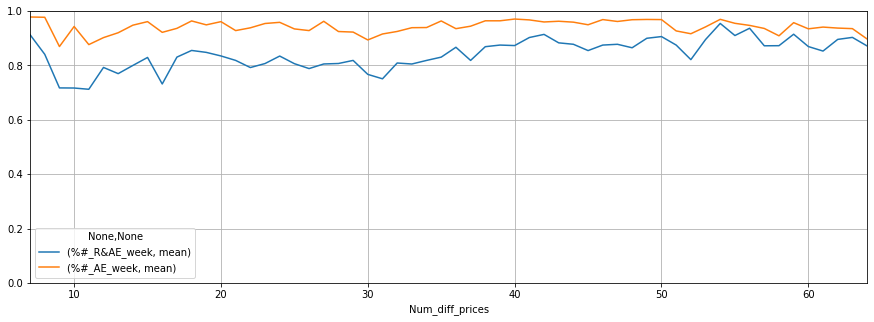

In [245]:
adeq_week_prices[[('%#_R&AE_week', 'mean'), ('%#_AE_week', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], grid=True)

In [221]:
# ae_stats = ['%AE', '%Robust&AE', '%QTY_AE']

# fig, ax = plt.subplots()
# fig.set_figwidth(12)    #  ширина Figure
# fig.set_figheight(6)    #  высота Figure
# ax.grid() # сетка

# plt.title('График зависимости адекватных значений от количества разных значений цен определенного SKU|Week')
# plt.xlabel('Num_diff_prices')
# plt.ylabel('%')

# for ae_stat in ae_stats:
#     ax.plot(adeq_week_prices['Num_diff_prices'], adeq_week_prices[ae_stat], label=ae_stat)
#     ax.legend()

## Зависимость свойств PED модели от SampleSize

In [52]:
adeq_day = sample_data_day.groupby(['SampleSize']).mean()

adeq_day.reset_index(inplace=True)

adeq_day.rename(columns={'flag_AE' : '%#_AE_day', 
                         'flag_R&AE' : '%#_R&AE_day'}, inplace=True)
adeq_day['%QTY_AE_day'] = adeq_day['QTY_AE_day'] / adeq_day['Qty']
adeq_day['%QTY_R&AE_day'] = adeq_day['QTY_R&AE_day'] / adeq_day['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_day', 'QTY_R&AE_day', 'Num_diff_prices']
adeq_day.drop(columns_drop, axis=1, inplace=True)

In [53]:
adeq_day

,SampleSize,Elasticity,Qty,Prices_mean_val,%#_AE_day,%#_R&AE_day,%QTY_AE_day,%QTY_R&AE_day
0,10,-1.376992,9.282984,326.160102,0.771614,0.097180,0.764144,0.162919
1,20,-1.143966,16.385104,328.477208,0.822828,0.177290,0.840411,0.332137
2,30,-1.091609,23.603751,328.229941,0.850679,0.241968,0.859513,0.437195
3,40,-1.058339,30.827117,329.277117,0.871637,0.297861,0.882018,0.526354
4,50,-1.035747,37.938849,328.674283,0.878936,0.335722,0.883220,0.580092
5,60,-1.016618,44.836204,329.953441,0.878373,0.373769,0.885949,0.616968
6,70,-1.009182,51.906223,329.342215,0.888853,0.415735,0.886865,0.650163
7,80,-1.003717,58.755173,329.355586,0.897008,0.435445,0.894352,0.672764
8,90,-0.993330,65.817285,330.332322,0.897951,0.473043,0.900708,0.703999
9,100,-0.992673,72.801006,330.080506,0.905016,0.489894,0.896487,0.721226


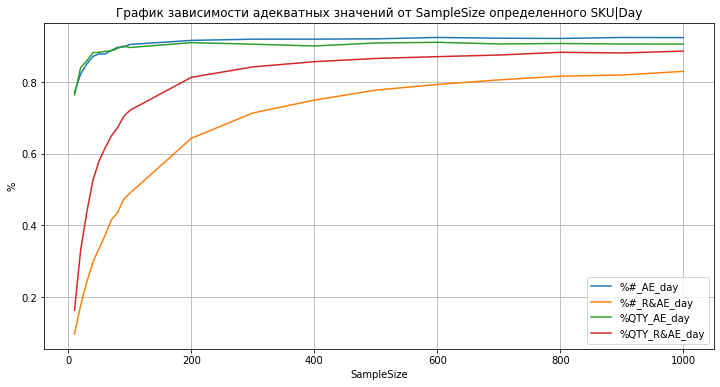

In [54]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day', '%QTY_AE_day', '%QTY_R&AE_day']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Day')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day.SampleSize, adeq_day[ae_stat], label=ae_stat)
    ax.legend()

In [55]:
adeq_week = sample_data_week.groupby(['SampleSize']).mean()

adeq_week.reset_index(inplace=True)

adeq_week.rename(columns={'flag_AE' : '%#_AE_week', 
                          'flag_R&AE' : '%#_R&AE_week'}, inplace=True)
adeq_week['%QTY_AE_week'] = adeq_week['QTY_AE_week'] / adeq_week['Qty']
adeq_week['%QTY_R&AE_week'] = adeq_week['QTY_R&AE_week'] / adeq_week['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_week', 'QTY_R&AE_week']
adeq_week.drop(columns_drop, axis=1, inplace=True)

In [67]:
adeq_week

,SampleSize,Elasticity,Qty,Prices_mean_val,Num_diff_prices,%#_AE_week,%#_R&AE_week,%QTY_AE_week,%QTY_R&AE_week
0,10,-1.124860,7.009557,326.820107,7.016955,0.850253,0.231887,0.859746,0.368854
1,20,-1.046785,13.820571,326.972943,11.277138,0.894428,0.427632,0.884501,0.606216
2,30,-1.031105,20.557269,327.664201,14.475627,0.911687,0.549765,0.890260,0.717628
3,40,-1.017415,27.070675,327.653276,17.138776,0.915924,0.622164,0.900297,0.762573
4,50,-1.021491,33.813441,327.931966,19.408167,0.924694,0.678055,0.904885,0.797950
5,60,-1.007405,40.643860,328.190132,21.402984,0.924201,0.700837,0.900938,0.800511
6,70,-1.009463,47.283707,328.332705,23.273487,0.925083,0.728527,0.910998,0.817856
7,80,-1.007972,53.934176,328.163592,24.865754,0.927845,0.754654,0.900116,0.828633
8,90,-1.008474,60.645071,328.283800,26.484912,0.930195,0.766647,0.903258,0.831100
9,100,-1.002650,67.437262,328.227083,27.970458,0.930667,0.780949,0.904398,0.841387


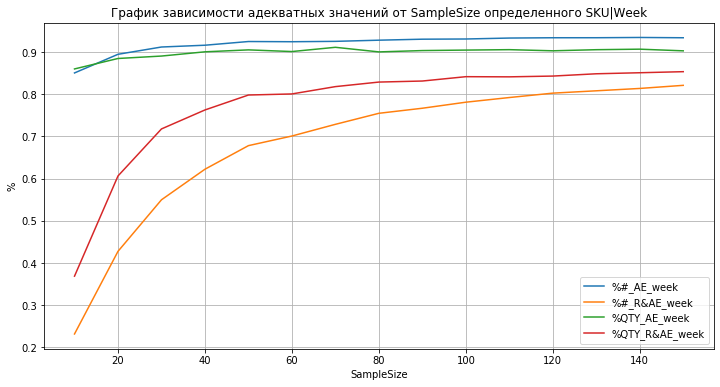

In [57]:
ae_stats_week = ['%#_AE_week', '%#_R&AE_week', '%QTY_AE_week', '%QTY_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Week')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()

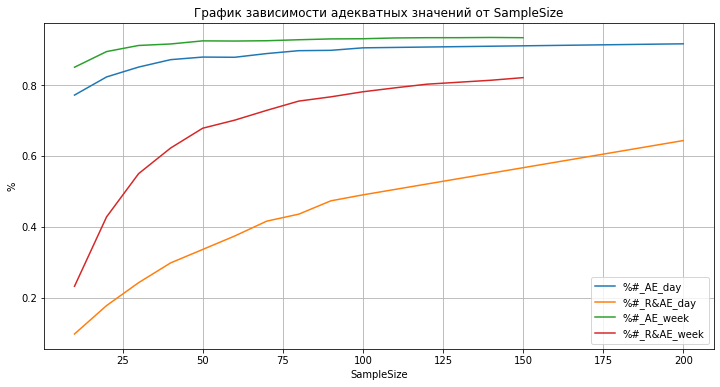

In [58]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day']
ae_stats_week = ['%#_AE_week', '%#_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day[:11].SampleSize, adeq_day[:11][ae_stat], label=ae_stat)
    ax.legend()

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()